 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../pandas_homework/Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../pandas_homework/Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../pandas_homework/Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combined_portfolios_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

In [15]:
# Algo 1 and Berkshire Hathaway perform better than the S&P 500.

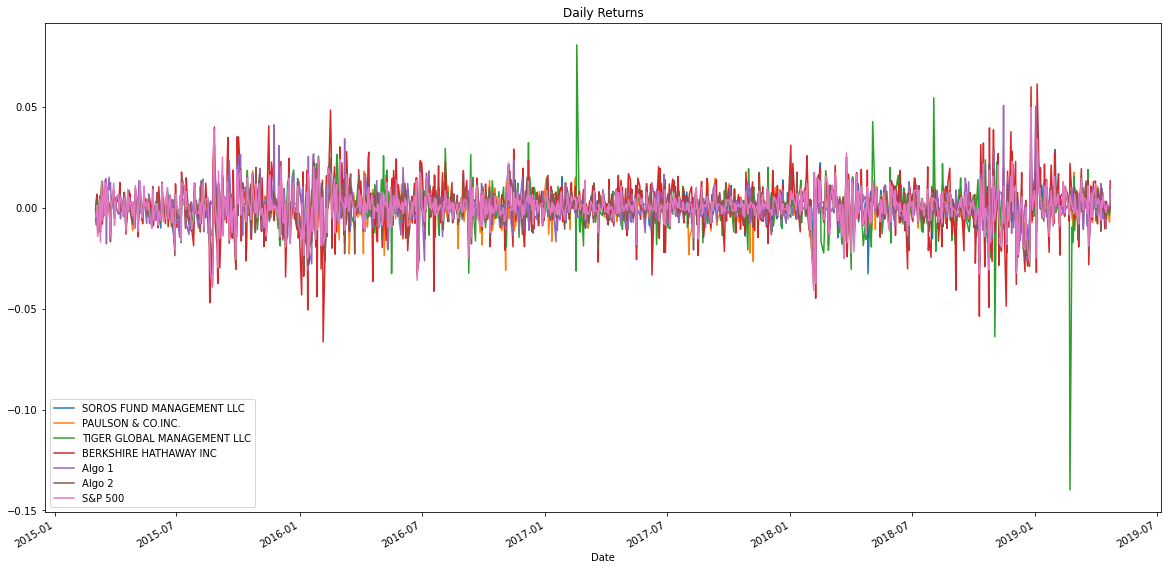

In [16]:
# Plot daily returns
combined_portfolios_returns.plot(figsize=(20,10),title='Daily Returns')

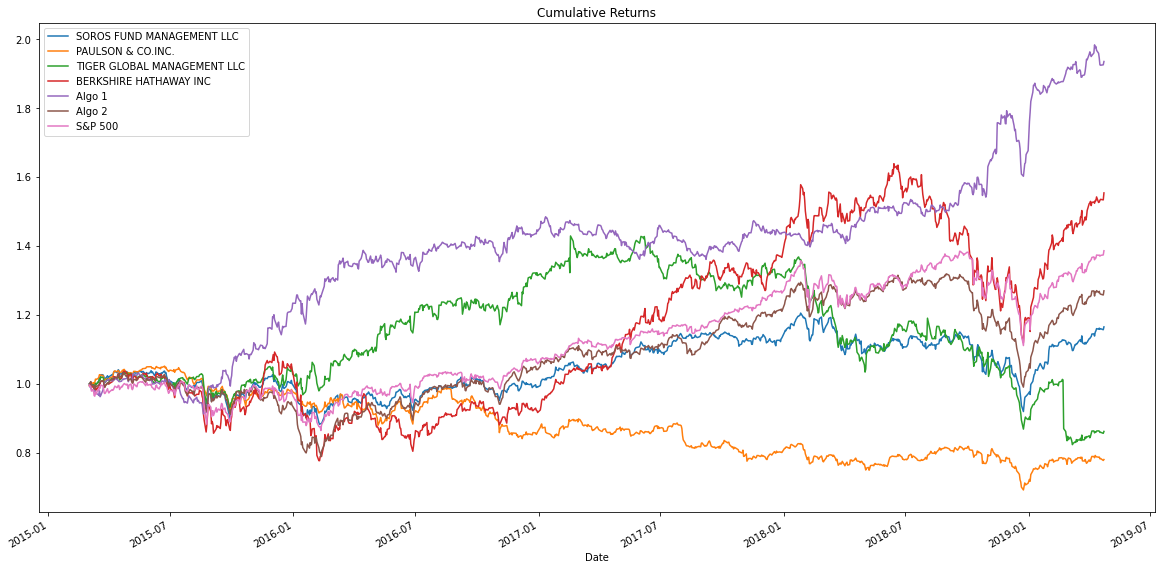

In [17]:
# Plot cumulative returns
cumulative_returns = (1 + combined_portfolios_returns).cumprod()
cumulative_returns.head()
cumulative_returns.plot(figsize=(20,10),title='Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

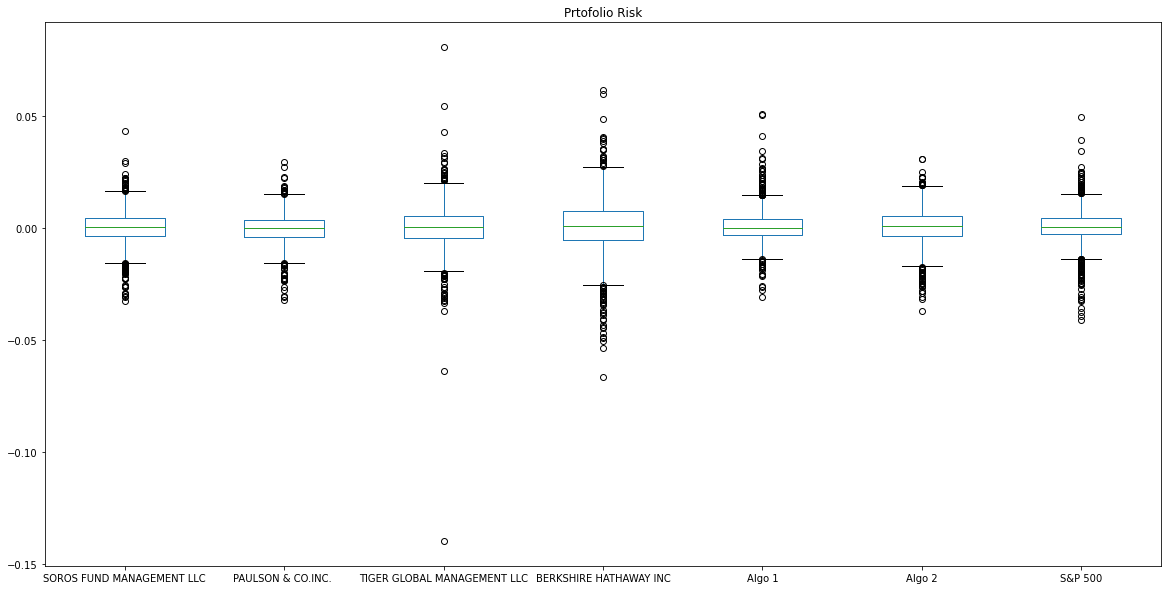

In [18]:
# Box plot to visually show risk
combined_portfolios_returns.plot.box(figsize=(20,10),title='Prtofolio Risk')

In [19]:
# Which box has the largest spread? Which has the smallest spread?
# Tiger Global Management has the largest spread in the box plot
# Paulson & Co Inc and Algo 2 have the the smallest spread in the box plot

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
portfolio_daily_std = combined_portfolios_returns.std()
portfolio_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500
sp500_std = combined_portfolios_returns["S&P 500"].std()
combined_portfolios_returns.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [22]:
# Which portfolios are riskier than the S&P 500?
# Tiger Global Management and Berkshire Hathaway are riskier than the S&P 500

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_portfolio_std = portfolio_daily_std * np.sqrt(252)
annualized_portfolio_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

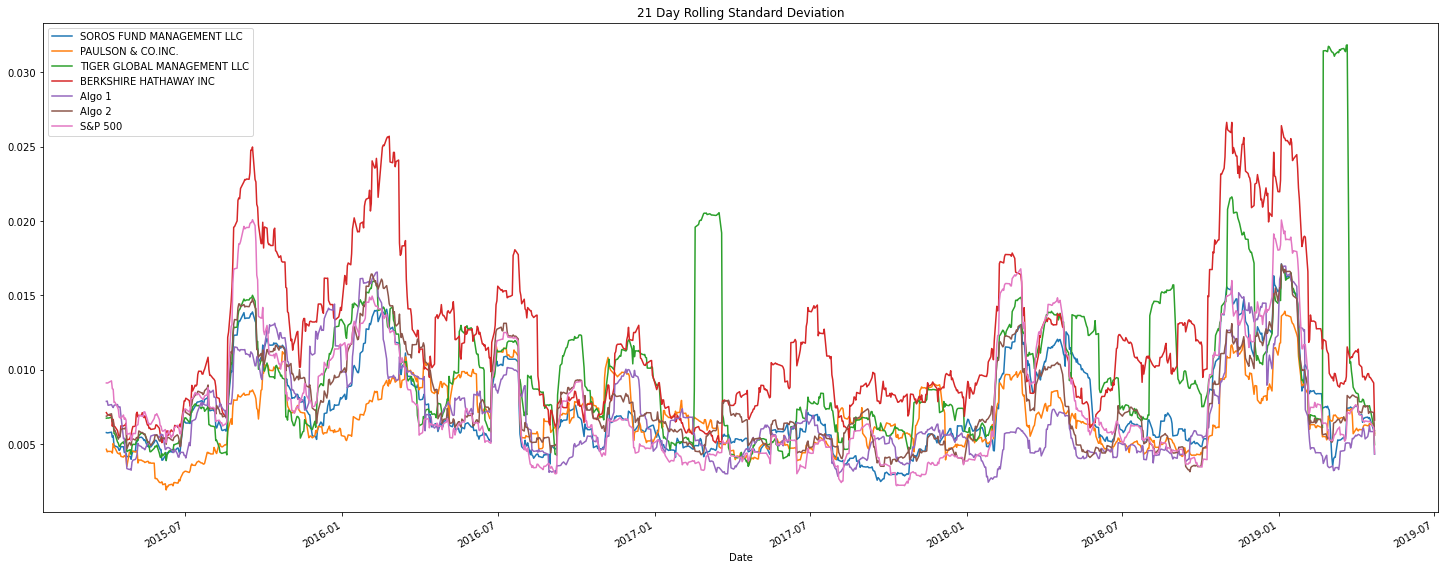

In [24]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_portfolios_returns.rolling(window=21).std().plot(figsize=(25,10),title='21 Day Rolling Standard Deviation')

In [25]:
# Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
# Tiger Global Management and Berkshire Hathaway do not follow the S&P 500 pattern 

In [26]:
# Construct a correlation table
correlation = combined_portfolios_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [27]:
# Which returns most closely mimic the S&P?
# Algo 2 is closely to mimic the S&P 500

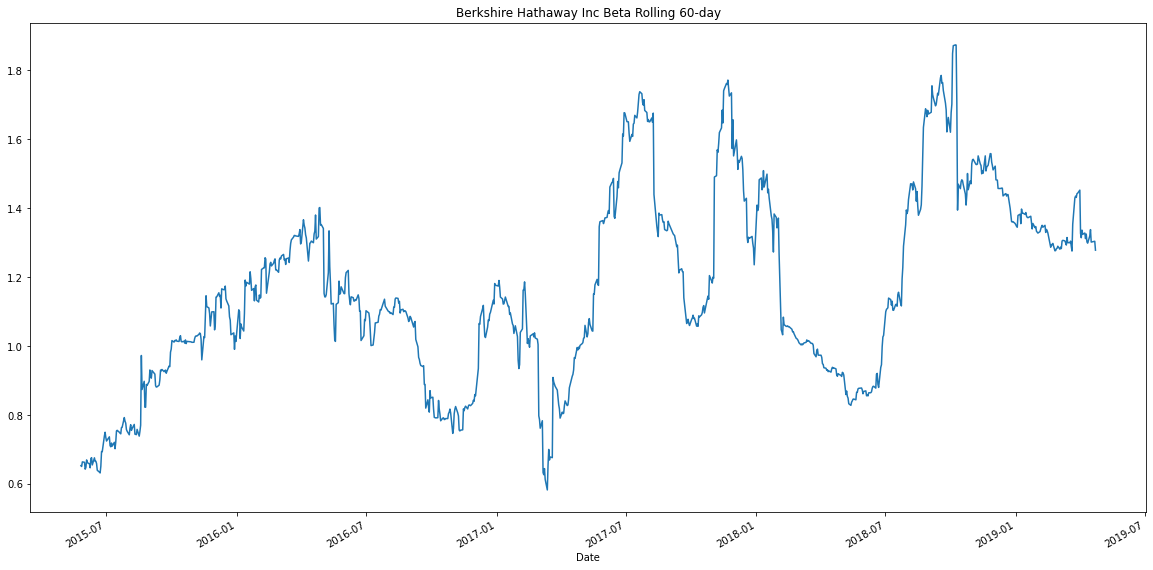

In [28]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_covariance_bhi = combined_portfolios_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_portfolios_returns['S&P 500'])
rolling_variance_sp500 = combined_portfolios_returns['S&P 500'].rolling(window=60).var()
rolling_beta_bhi = rolling_covariance_bhi / rolling_variance_sp500
rolling_beta_bhi.plot(figsize=(20, 10), title='Berkshire Hathaway Inc Beta Rolling 60-day')

In [29]:
# Does the portfolio seem sensitive to movements in the S&P 500?
# Yes it does

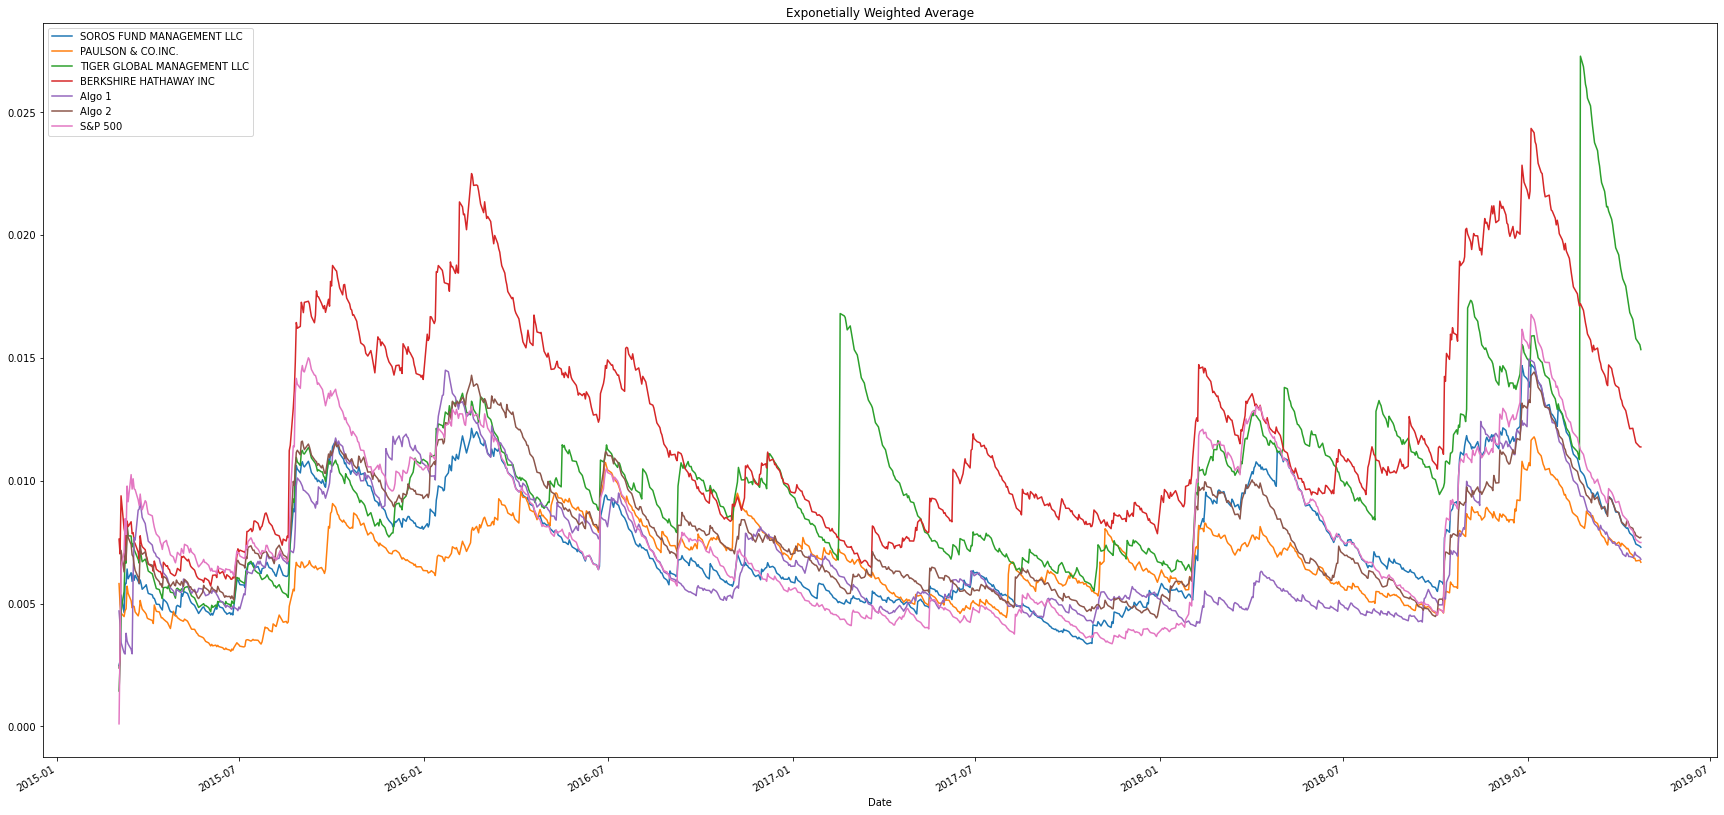

In [30]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_portfolios_returns.ewm(halflife=21).std().plot(figsize = (30,15), title = "Exponetially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [31]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_returns.mean() * 252) / (combined_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

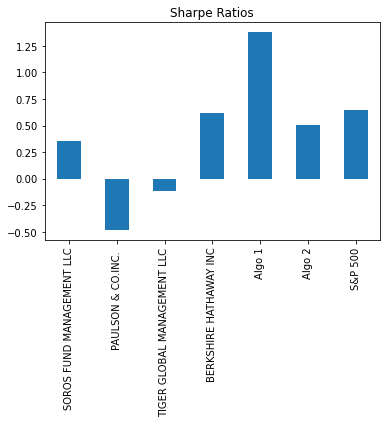

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

In [33]:
# Yes, Algo 1 is perfoming much better than any of the other portfolios includign the S&P 500.
# Algo 2 is not performing better than S&P 500 and Berkshire Hathaway but 
# it is better than the other proftolios.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Read the first stock
amz_path = Path('../pandas_homework/Resources/amz.csv')
amz_df = pd.read_csv(amz_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
amz_df.reset_index(inplace=True)
amz_df['Date'] = amz_df['Date'].dt.normalize()
amz_df.set_index(amz_df['Date'], inplace=True)
amz_df.drop(columns='Date',inplace=True)
amz_df.rename(columns={'Close': 'AMZ'},inplace=True)
amz_df.head()

,AMZ
Date,
2015-01-02,469.70
2015-01-05,448.48
2015-01-06,440.43
2015-01-07,439.52
2015-01-08,445.45


In [35]:
# Read the second stock
nflx_path = Path('../pandas_homework/Resources/nflx.csv')
nflx_df = pd.read_csv(nflx_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
nflx_df.reset_index(inplace=True)
nflx_df ['Date'] = nflx_df['Date'].dt.normalize()
nflx_df.set_index(nflx_df['Date'], inplace=True)
nflx_df.drop(columns='Date',inplace=True)
nflx_df.rename(columns={'Close': 'NFLX'},inplace=True)
nflx_df.head()

,NFLX
Date,
2015-01-02,49.85
2015-01-05,47.31
2015-01-06,46.50
2015-01-07,46.74
2015-01-08,47.78


In [36]:
# Read the third stock
tsla_path = Path('../pandas_homework/Resources/tsla.csv')
tsla_df = pd.read_csv(tsla_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_df.reset_index(inplace=True)
tsla_df['Date'] = tsla_df['Date'].dt.normalize()
tsla_df.set_index(tsla_df['Date'], inplace=True)
tsla_df.drop(columns='Date',inplace=True)
tsla_df.rename(columns={'Close': 'TSLA'},inplace=True)
tsla_df.head()

,TSLA
Date,
2015-01-02,43.86
2015-01-05,42.02
2015-01-06,42.26
2015-01-07,42.19
2015-01-08,42.12


In [37]:
#Concatenating basis
column_appended_data = pd.concat([amz_df,nflx_df,tsla_df], axis="columns", join="inner")
column_appended_data.head()

,AMZ,NFLX,TSLA
Date,,,
2015-01-02,469.70,49.85,43.86
2015-01-05,448.48,47.31,42.02
2015-01-06,440.43,46.50,42.26
2015-01-07,439.52,46.74,42.19
2015-01-08,445.45,47.78,42.12


In [38]:
#Calculating daily returns 
custom_daily_returns = column_appended_data.pct_change()
custom_daily_returns.dropna(inplace=True)
custom_daily_returns.head()

,AMZ,NFLX,TSLA
Date,,,
2015-01-05,-0.045178,-0.050953,-0.041952
2015-01-06,-0.017950,-0.017121,0.005712
2015-01-07,-0.002066,0.005161,-0.001656
2015-01-08,0.013492,0.022251,-0.001659
2015-01-09,-0.001414,-0.015488,-0.018756


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
custom_returns = custom_daily_returns.dot(weights)
custom_returns.name = 'Custom'
custom_returns.head()

Date
2015-01-05   -0.046027
2015-01-06   -0.009786
2015-01-07    0.000480
2015-01-08    0.011361
2015-01-09   -0.011886
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_portfolios_returns_and_custom = pd.concat([combined_portfolios_returns,custom_returns],axis="columns", join="inner")
combined_portfolios_returns_and_custom.dropna(inplace=True)
combined_portfolios_returns_and_custom.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.016600
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.009911
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.005992
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.008767
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.004062


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
daily_std_with_custom = combined_portfolios_returns_and_custom.std()
annualized_std_with_custom = daily_std_with_custom * np.sqrt(252)
annualized_std_with_custom

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom                         0.268798
dtype: float64

In [42]:
# My custom porfolio looks a lot risker than the S&P 500

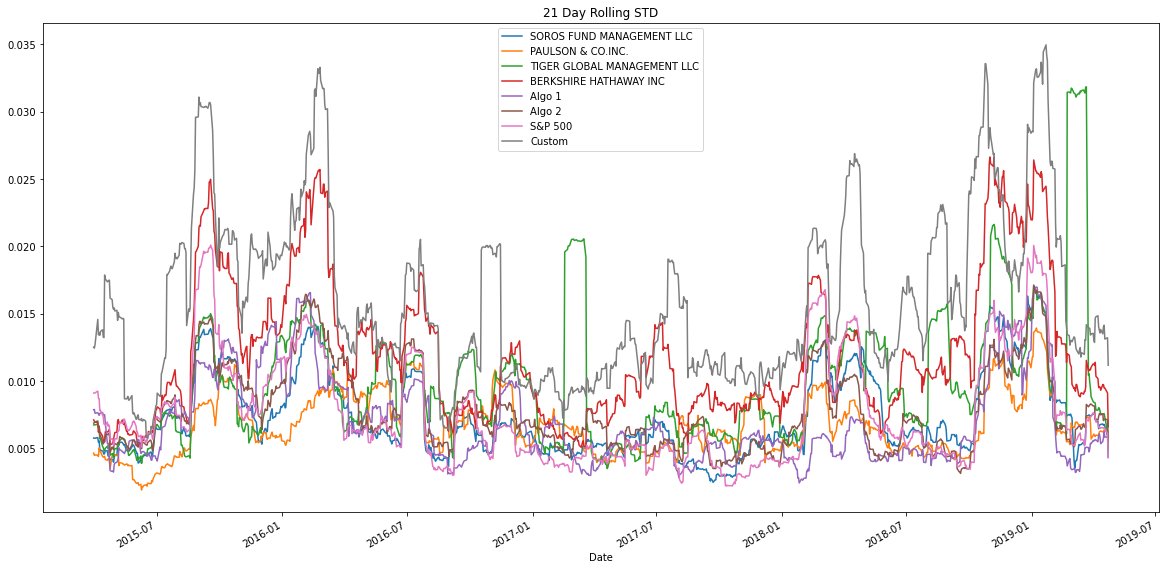

In [43]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_portfolios_returns_and_custom.rolling(window=21).std().plot(figsize = (20,10), title = "21 Day Rolling STD")

In [44]:
# Annualized Sharpe Ratios
sharpe_ratios_with_custom = (combined_portfolios_returns_and_custom.mean() * 252) / (combined_portfolios_returns_and_custom.std() * np.sqrt(252))
sharpe_ratios_with_custom

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom                         0.711886
dtype: float64

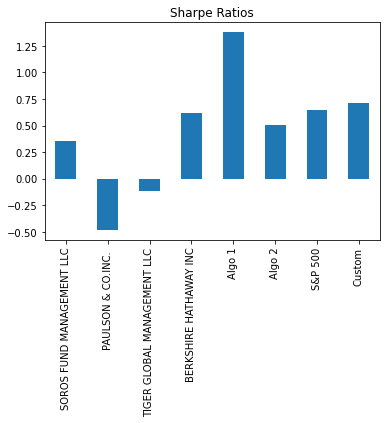

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_with_custom.plot(kind="bar", title="Sharpe Ratios")

In [46]:
# The custom protfolio shows a perform better than the S&P 500

In [47]:
# Create a correlation analysis
correlation_with_custom = combined_portfolios_returns_and_custom.corr()
correlation_with_custom

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.615187
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.467442
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.382012
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.677887
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.283853
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.613320
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.641010
Custom,0.615187,0.467442,0.382012,0.677887,0.283853,0.613320,0.641010,1.000000


In [48]:
# There is no much correlation between the S&P 500 and the Custom portfolio

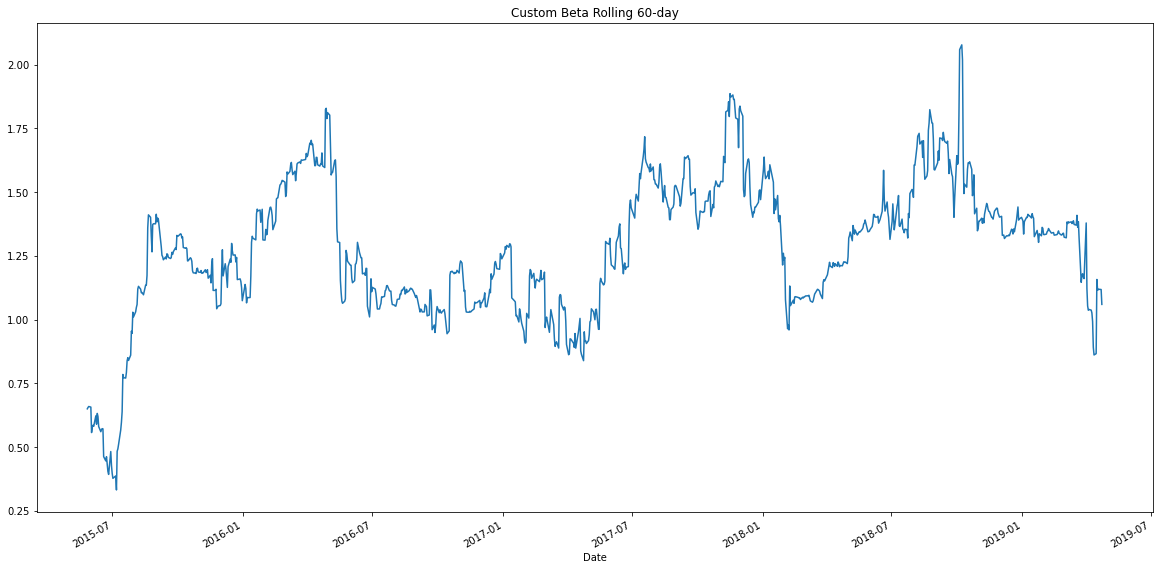

In [49]:
# Beta
rolling_covariance_custom = combined_portfolios_returns_and_custom['Custom'].rolling(window=60).cov(combined_portfolios_returns_and_custom['S&P 500'])
rolling_variance_sp500_with_custom = combined_portfolios_returns_and_custom['S&P 500'].rolling(window=60).var()
rolling_beta_custom= rolling_covariance_custom / rolling_variance_sp500_with_custom
rolling_beta_custom.plot(figsize=(20, 10), title='Custom Beta Rolling 60-day')

In [50]:
# Custom portfolio is sensitive to the movements of the S&P 500

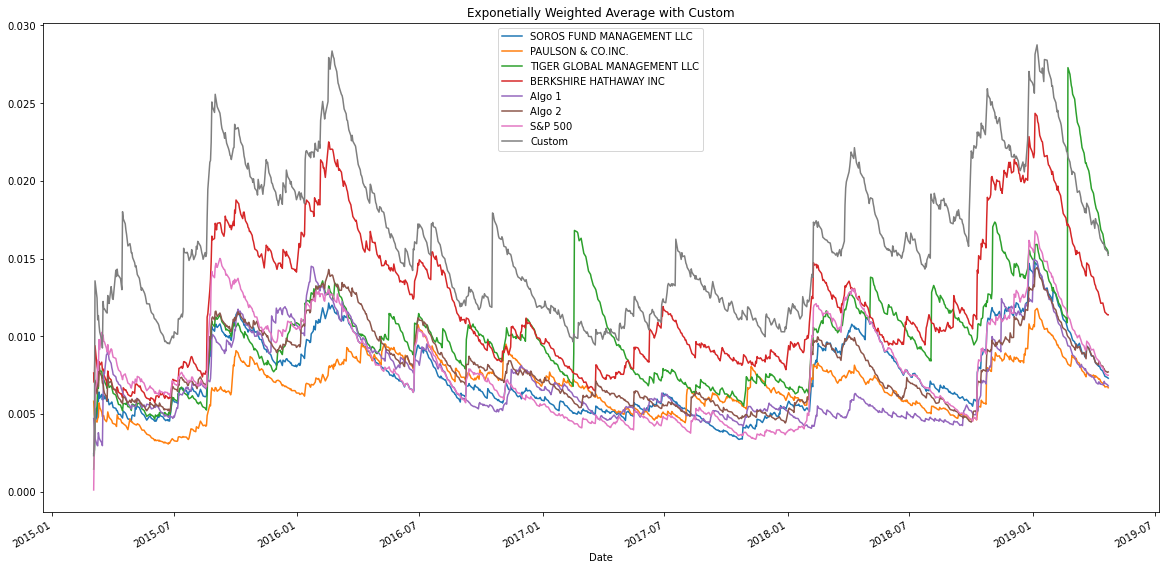

In [51]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_portfolios_returns_and_custom.ewm(halflife=21).std().plot(figsize = (20,10), title = "Exponetially Weighted Average with Custom")

In [52]:
# The Custom portfolio is perfoming abvoe the S&P 500